## setting

In [70]:
import torch

In [71]:
def f(txt,mapping):
    return [mapping[chr] for chr in txt]

## data

In [72]:
txt = list('hi!')*3 + list('hi?')*3 
txt_x = txt[:-1] 
txt_y = txt[1:] 

In [73]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [74]:
txt1= txt[:9]
txt2= txt[9:]

In [75]:
txt1_x = txt1[:-1] 
txt1_y = txt1[1:] 
txt2_x = txt2[:-1] 
txt2_y = txt2[1:] 

In [76]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_x,mapping))).float().to("cuda:0")
y1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_y,mapping))).float().to("cuda:0")
x2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_x,mapping))).float().to("cuda:0")
y2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_y,mapping))).float().to("cuda:0")
x1.shape,y1.shape,x2.shape,y2.shape

(torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]),
 torch.Size([8, 4]))

In [77]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(4,10).to("cuda")
linr = torch.nn.Linear(10,4).to("cuda")

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(list(lstm.parameters()) + list(linr.parameters()),lr = 0.1)

In [78]:
xx = torch.stack([x1,x2],axis=1)
yy = torch.stack([y1,y2],axis=1)
xx.shape, yy.shape

(torch.Size([8, 2, 4]), torch.Size([8, 2, 4]))

In [89]:
for epoc in range(200):
    ##1 output
    hidden,_ = lstm(xx)
    output = linr(hidden)
    print(output.shape,yy.shape)
    ##2 loss
    loss = loss_fn(output,yy)
    ##3
    loss.backward()
    if epoc % 10 == 0:
        print(loss)
    ##4
    optimizer.step()
    optimizer.zero_grad()

torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
tensor(0.2599, device='cuda:0', grad_fn=<DivBackward1>)
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
tensor(0.2599, device='cuda:0', grad_fn=<DivBackward1>)
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Size([8, 2, 4]) torch.Size([8, 2, 4])
torch.Si

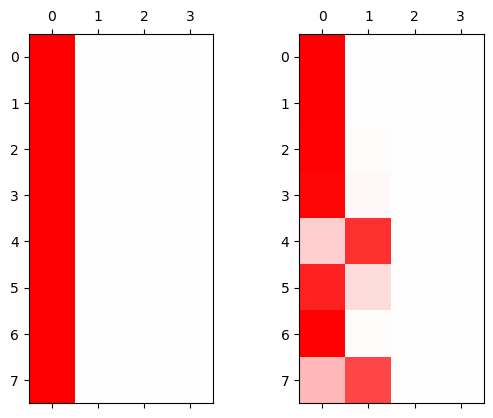

In [85]:
import matplotlib.pyplot as plt
soft = torch.nn.Softmax(dim=1)

fig , ax = plt.subplots(1,2) 
ax[0].matshow(soft(output[:,0,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)
ax[1].matshow(soft(output[:,1,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

In [88]:
torch.argmax(soft(output[:,0,:]),dim=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')